# 多元线性回归的梯度下降

### 代价函数
多元线性回归的代价函数为
$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^n(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
其中 $h_{\theta}(x) = \theta^Tx$

### 梯度下降迭代公式

同单变量线性回归相似，梯度下降迭代公式如下
$$
\theta_j := \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta_j)
$$
即
$$
\theta_j := \theta_j-\alpha\frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^n(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
求导后可得到
$$
\theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^n((h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)})
$$
其中 $j=0,1,2,...,n$

### 多元线性回归实例

数据集：

|Size|Number of bedrooms|Price|
|:---:|:----:|:-----:|
|2104|3|399900|
|1600|3|329900|
|2400|3|369000|
|1416|2|232000|
|...|...|...|

见文件 [data.csv](./data.csv)

In [1]:
# 加载第三方包和数据集
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data_path = './data.csv'
data = np.loadtxt(data_path, delimiter=',', dtype=np.double)
data[0:5, :]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

### 标准化
可以看到不同特征值的数量级差异是非常大的，这时候可以采用z-score标准化将数据进行标准化处理

z-score 标准化公式：
$$
y=\frac{x-mean(X)}{std(X)}
$$
其中 mean为 $X$ 的平均值，std为 $X$ 的标准差

In [2]:
# z-score 标准化
normalized_data = stats.zscore(data, axis=0, ddof=1)
normalized_data[0:5, :]

array([[ 0.13000987, -0.22367519,  0.47574687],
       [-0.50418984, -0.22367519, -0.08407444],
       [ 0.50247636, -0.22367519,  0.22862575],
       [-0.73572306, -1.53776691, -0.86702453],
       [ 1.25747602,  1.09041654,  1.59538948]])

### 训练数据和参数的

In [3]:
alpha = 0.01                           # 学习率
iters = 500                            # 迭代次数
theta = np.zeros((1, x.shape[1]))      # [[0, 0, 0]]
# 从数据集中提取出 x, y
x = normalized_data[:,0:2]
y = normalized_data[:,2:3]
# 注意 x 应该补一列 1
x = np.hstack((np.ones(y.shape), x))
print(x[0])
print(y[0])

[ 1.          0.13000987 -0.22367519]
[0.47574687]


In [4]:
# 计算代价函数值
def cost_func(x, y, theta):
    m = x.shape[0]
    inner = np.dot(x, theta.T) - y
    squre_sum = np.dot(inner.T, inner).item()    # .item 将 1x1 的矩阵转换为标量
    return squre_sum / (2 * m)

In [14]:
# 梯度下降
def grad_desc(x, y, theta, alpha, iters):
    """
    theta: 初始值
    alpha: 学习率
    iters: 最大迭代次数
    """
    m = x.shape[0]
    cost = [cost_func(x, y, theta)]              # 保存迭代过程中的代价
    _theta = theta.copy()                        # 拷贝一份
    for _i in range(iters):
        inner = np.dot(x, _theta.T) - y
        gradient = (1/m) * np.dot(inner.T, x)    # 梯度
        _theta = _theta - alpha * gradient       # 更新 theta 的值
        cost.append(cost_func(x, y, _theta))
    return _theta, cost

In [15]:
# 测试效果
best_theta, cost = grad_desc(x, y, theta, alpha, iters)
best_theta

array([[-1.21480840e-16,  8.30383883e-01,  8.23982853e-04]])

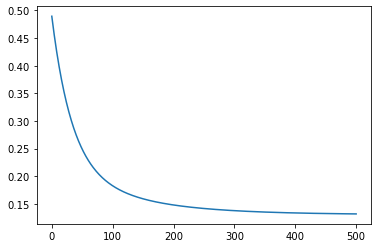

In [16]:
plt.plot(cost)
plt.show()

可以看到代价函数值随着迭代的过程在逐渐下降